In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
cli_df = pd.read_csv("cli_proc.csv")
messages_df = pd.read_csv("messages_proc.csv")
v2ray_df = pd.read_csv("v2ray_proc.csv")

In [21]:
cli_df["Discrepancy"].value_counts()

Discrepancy
False    20019
True       897
Name: count, dtype: int64

In [22]:
print(len(cli_df[cli_df["Discrepancy"] == True]), "mismatches in cli files")
print(len(messages_df[messages_df["Discrepancy"] == True]), "mismatches in messages files")
print(len(v2ray_df[v2ray_df["Discrepancy"] == True]), "mismatches in v2ray files")

897 mismatches in cli files
110 mismatches in messages files
744 mismatches in v2ray files


In [23]:
df = pd.concat([cli_df, messages_df, v2ray_df], ignore_index=True)
test_code_df = df[df["old_path"].str.contains("test", case=False, na=False) | df["new_path"].str.contains("test", case=False, na=False)]
readme_df = df[df["old_path"].str.contains("readme", case=False, na=False) | df["new_path"].str.contains("readme", case=False, na=False)]
license_df = df[df["old_path"].str.contains("license", case=False, na=False) | df["new_path"].str.contains("license", case=False, na=False)]
source_df = df[~df.index.isin(test_code_df.index) & ~df.index.isin(readme_df.index) & ~df.index.isin(license_df.index)]
# print(len(combined_df), "total files processed")
print(len(df), "total files processed")

45306 total files processed


In [24]:
print(len(df), "total files processed")
print(len(test_code_df), "test files processed")
print(len(readme_df), "readme files processed")
print(len(license_df), "license files processed")
print(len(source_df), "source files processed")

45306 total files processed
10958 test files processed
354 readme files processed
420 license files processed
33603 source files processed


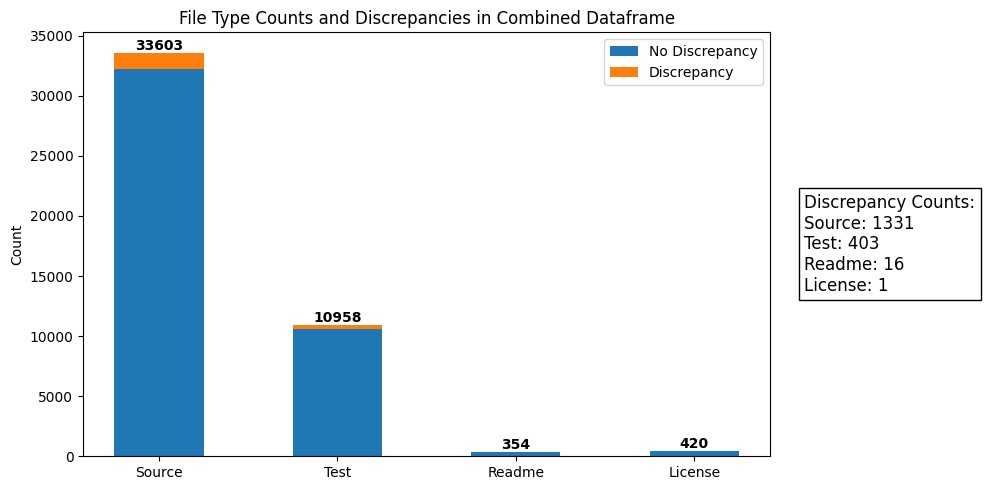

In [27]:
import matplotlib.pyplot as plt
total_counts = [len(source_df), len(test_code_df), len(readme_df), len(license_df)]
discrepancy_counts = [len(source_df[source_df["Discrepancy"] == True]), len(test_code_df[test_code_df["Discrepancy"] == True]), len(readme_df[readme_df["Discrepancy"] == True]), len(license_df[license_df["Discrepancy"] == True])]
categories = ['Source', 'Test', 'Readme', 'License']
x = range(len(categories))

plt.figure(figsize=(10,5))
plt.bar(x, [t-d for t, d in zip(total_counts, discrepancy_counts)], width=0.5, label='No Discrepancy')
plt.bar(x, discrepancy_counts, width=0.5, bottom=[t-d for t, d in zip(total_counts, discrepancy_counts)], label='Discrepancy')

for i in x:
    plt.text(i, total_counts[i]+0.5, str(total_counts[i]), ha='center', va='bottom', fontweight='bold')
    # if discrepancy_counts[i] > 0:
        # plt.text(i, total_counts[i]-discrepancy_counts[i]/2, str(discrepancy_counts[i]), ha='center', va='center', color='white', fontweight='bold')

# Add textbox on the right
discrepancy_text = "\n".join([f"{cat}: {count}" for cat, count in zip(categories, discrepancy_counts)])
plt.gca().text(1.05, 0.5, f"Discrepancy Counts:\n{discrepancy_text}", transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', edgecolor='black'))

plt.xticks(x, categories)
plt.ylabel('Count')
plt.title('File Type Counts and Discrepancies in Combined Dataframe')
plt.legend()
plt.tight_layout()
plt.show()
